<a href="https://www.kaggle.com/code/benzilla987/data445-kaggle-project-2?scriptVersionId=141953503" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Kaggle Project 2

This project will utilize the Retail dataset from Kaggle. The goal of this project is to see how accurately we can predict a customers age based on the other variables that are available in the Retail dataset. 

# Initial exploratory analysis

In [1]:
# Importing relevant libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Reading in the data 
retail=pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")

In [3]:
retail.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000


In [4]:
# Looking at the shape of the data 
retail.shape
# 9 variables, 1000 observations

(1000, 9)

In [5]:
## Checking datatypes
retail.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

## Using age/gender to try to predict purchasing behavior

In [6]:
## Pre-Processing Data

# # One-hot encoding the 'Product Category' column
# retail = pd.get_dummies(retail, columns=['Product Category'], prefix='Product_Category', dtype=int)


# Converting product categories to numerical
retail['Product Category']=retail['Product Category'].map({'Beauty':0,'Clothing':1, 'Electronics':2}).astype(int)

# Converting genders to binary
retail['Gender']=retail['Gender'].map({'Male':0,'Female':1}).astype(int)

In [7]:
## Dropping variables that are not relevant to this study
retail.drop(columns=['Transaction ID','Date','Transaction ID','Customer ID'],inplace=True)

Total Amount        0.060568
Product Category    0.039186
Price per Unit      0.038423
Quantity            0.023737
Gender              0.002621
Name: Age, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

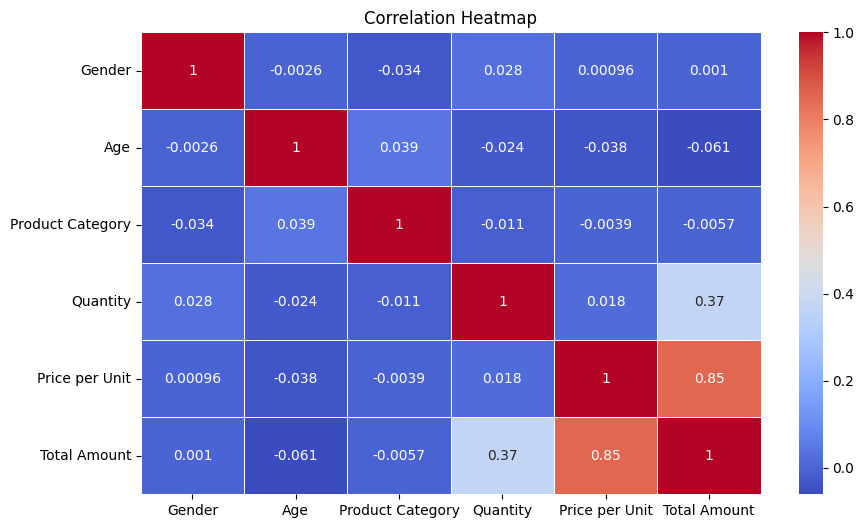

In [8]:
# Determining which variables in the dataframe have the highest correlation
# with a customer's age.

# Calculating the correlation matrix
correlation_matrix=retail.corr()

# Extrating the correlation of 'Age' with other variables
age_correlation=correlation_matrix['Age'].drop('Age')

# Sorting variables by their correlation with age in descending order
age_correlation_sorted=age_correlation.abs().sort_values(ascending=False)

# Printing the correlation values
print(age_correlation_sorted)

# Creating a heatmap to visualize correlations
plt.figure(figsize=(10,6))
sns.heatmap(retail.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show

In [9]:
## From the above chart, it doesn't really make sense to try and predict age. There's not a
## high correlation between age and any of the other provided variables. 

In [10]:
retail.head(1)

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,34,0,3,50,150


In [11]:


# Split the data into training and testing sets (e.g., 80% train, 20% test)
X = retail[['Age', 'Gender']]
y = retail['Total Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 295712.7997291931
R-squared: -0.010192397467003733


In [12]:
## The results indicate that age and gender are not very good predictors of total amount of money spent.
## This is just more evidence that age and gender don't really have high correlation w/anything else
## in this dataset. 

## Examining whether or not there are discernible patterns in sales across different time periods.

In [13]:
# Reading in the data 
retail=pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")

# Updating date variable to datetime dtype
retail['Date'] = pd.to_datetime(retail['Date'])

In [14]:
# # Aggregate data by month and sum the 'Total Amount' per month
# monthly_sales = retail.resample('D').sum()

# # Create a time series plot for monthly total amount
# plt.figure(figsize=(12, 6))
# plt.plot(monthly_sales.index, monthly_sales['Total Amount'], marker='o', linestyle='-')
# plt.xlabel('Date (Monthly)')
# plt.ylabel('Total Amount')
# plt.title('Monthly Total Amount')
# plt.grid(True)
# plt.show()

In [15]:
# # Aggregate data by month and sum the 'Total Amount' per month
# monthly_sales = retail.resample('M').sum()

# # Create a time series plot for monthly total amount
# plt.figure(figsize=(12, 6))
# plt.plot(monthly_sales.index, monthly_sales['Quantity'], marker='o', linestyle='-')
# plt.xlabel('Date (Monthly)')
# plt.ylabel('Quantity')
# plt.title('Monthly Quantity')
# plt.grid(True)
# plt.show()